<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Data-Preparation-and-Exploration" data-toc-modified-id="1.-Data-Preparation-and-Exploration-1">1. Data Preparation and Exploration</a></span><ul class="toc-item"><li><span><a href="#1.1-Handling-missing-values" data-toc-modified-id="1.1-Handling-missing-values-1.1">1.1 Handling missing values</a></span></li><li><span><a href="#1.2-Numeric-Variables" data-toc-modified-id="1.2-Numeric-Variables-1.2">1.2 Numeric Variables</a></span></li><li><span><a href="#1.3-Categorical-Variables" data-toc-modified-id="1.3-Categorical-Variables-1.3">1.3 Categorical Variables</a></span></li></ul></li><li><span><a href="#2.-Logistic-Regression" data-toc-modified-id="2.-Logistic-Regression-2">2. Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#2.1-Baseline-Model" data-toc-modified-id="2.1-Baseline-Model-2.1">2.1 Baseline Model</a></span></li><li><span><a href="#2.2-Feature-Selection" data-toc-modified-id="2.2-Feature-Selection-2.2">2.2 Feature Selection</a></span></li><li><span><a href="#2.3-Optimal-LogReg-Model-(10-features)" data-toc-modified-id="2.3-Optimal-LogReg-Model-(10-features)-2.3">2.3 Optimal LogReg Model (10 features)</a></span></li></ul></li><li><span><a href="#3.-KNeighbor-Classifier" data-toc-modified-id="3.-KNeighbor-Classifier-3">3. KNeighbor Classifier</a></span></li><li><span><a href="#4.-Naive-Bayes" data-toc-modified-id="4.-Naive-Bayes-4">4. Naive Bayes</a></span></li><li><span><a href="#5.-Model-Comparison-and-Final-Model-Choice" data-toc-modified-id="5.-Model-Comparison-and-Final-Model-Choice-5">5. Model Comparison and Final Model Choice</a></span></li><li><span><a href="#6.-Next-Step---Application-to-Business-Customers" data-toc-modified-id="6.-Next-Step---Application-to-Business-Customers-6">6. Next Step - Application to Business Customers</a></span></li></ul></div>

# Mobile Customer Churn

In this Portfolio task you will work with some (fake but realistic) data on Mobile Customer Churn.  Churn is where
a customer leaves the mobile provider.   The goal is to build a simple predictive model to predict churn from available features. 

The data was generated (by Hume Winzar at Macquarie) based on a real dataset provided by Optus.  The data is simulated but the column headings are the same. (Note that I'm not sure if all of the real relationships in this data are preserved so you need to be cautious in interpreting the results of your analysis here).  

The data is provided in file `MobileCustomerChurn.csv` and column headings are defined in a file `MobileChurnDataDictionary.csv` (store these in the `files` folder in your project).

Your high level goal in this notebook is to try to build and evaluate a __predictive model for churn__ - predict the value of the CHURN_IND field in the data from some of the other fields.  Note that the three `RECON` fields should not be used as they indicate whether the customer reconnected after having churned. 

__Note:__ you are not being evaluated on the _accuracy_ of the model but on the _process_ that you use to generate it.  You can use a simple model such as Logistic Regression for this task or try one of the more advanced methods covered in recent weeks.  Explore the data, build a model using a selection of features and then do some work on finding out which features provide the most accurate results.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
churn = pd.read_csv("files/MobileCustomerChurn.csv", na_values=["NA", "#VALUE!"], index_col='INDEX')

## 1. Data Preparation and Exploration

In [3]:
# Drop RECON variables
churn = churn.drop(columns=['RECON_SMS_NEXT_MTH', 'RECON_TELE_NEXT_MTH', 'RECON_EMAIL_NEXT_MTH'], axis=1)

# Set index
churn = churn.set_index('CUST_ID')
churn.head()

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE
CUST_ID,,,,,,,,,,,,,,,,,
1,46,1,30.0,CONSUMER,46,54.54,NON BYO,15,0,24,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA
2,60,3,55.0,CONSUMER,59,54.54,NON BYO,5,0,24,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW
5,65,1,29.0,CONSUMER,65,40.90,BYO,15,0,12,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA
6,31,1,51.0,CONSUMER,31,31.81,NON BYO,31,0,24,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC
8,95,1,31.0,CONSUMER,95,54.54,NON BYO,0,0,24,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW


In [4]:
# Check df shape
print("df shape:", churn.shape,'\n')

# Check null values
print(churn.isnull().sum())

df shape: (46206, 17) 

ACCOUNT_TENURE                   0
ACCT_CNT_SERVICES                0
AGE                             76
CFU                              0
SERVICE_TENURE                   0
PLAN_ACCESS_FEE                  0
BYO_PLAN_STATUS                  0
PLAN_TENURE                      0
MONTHS_OF_CONTRACT_REMAINING     0
LAST_FX_CONTRACT_DURATION        0
CONTRACT_STATUS                  0
PREV_CONTRACT_DURATION           0
HANDSET_USED_BRAND               0
CHURN_IND                        0
MONTHLY_SPEND                    0
COUNTRY_METRO_REGION             1
STATE                            1
dtype: int64


In [5]:
# Check the 76 na in AGE
churn.loc[churn['AGE'].isnull()]

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE
CUST_ID,,,,,,,,,,,,,,,,,
390,94,2,NaN,SMALL BUSINESS,94,45.44,NON BYO,27,0,24,OFF-CONTRACT,24,HUAWEI,1,51.79,COUNTRY,NSW
441,39,4,NaN,SMALL BUSINESS,1,36.36,NON BYO,1,0,0,NO-CONTRACT,0,SAMSUNG,1,48.37,METRO,NSW
4454,4,2,NaN,SMALL BUSINESS,4,72.72,NON BYO,4,20,24,ON-CONTRACT,0,SAMSUNG,1,72.72,METRO,ACT
5602,8,4,NaN,SMALL BUSINESS,8,27.27,BYO,5,0,0,NO-CONTRACT,0,APPLE,1,37.66,METRO,VIC
9178,9,3,NaN,SMALL BUSINESS,9,72.72,NON BYO,9,15,24,ON-CONTRACT,0,APPLE,1,72.72,METRO,NSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72536,7,3,NaN,SMALL BUSINESS,5,27.27,BYO,5,0,0,NO-CONTRACT,0,SAMSUNG,1,72.56,METRO,VIC
73087,94,2,NaN,SMALL BUSINESS,16,54.54,NON BYO,0,24,24,ON-CONTRACT,0,APPLE,0,91.35,METRO,VIC
75927,0,1,NaN,SMALL BUSINESS,0,45.45,NON BYO,0,0,0,NO-CONTRACT,0,APPLE,0,45.45,METRO,WA


It seems majority of rows with missing value in AGE are <u>business customers</u> ('small business' in CFU) and it makes sense that they don't have an age.

What's more important about this finding is that we want to separate them out from 'consumer'(personal) customers, as they presumaly have different churn behaviours. Also, from my experience working for Telco clients in the market research industy, consumer and business customers are usually taken care of by separate departments and from an operation point view, it is unlikely the two teams will share data base and want to build an all inclusive model.

So for this piece of analysis, **we'll mainly focus on the consumer data and extend to business customers should capacity permits.**

In [6]:
# Split the main df into consumer and business

cons = churn.loc[churn['CFU']=='CONSUMER']
bus = churn.loc[churn['CFU']=='SMALL BUSINESS']

# Drop the CFU column
cons = cons.drop(columns='CFU', axis=1)
bus = bus.drop(columns='CFU', axis=1)

print("consumer df shape:", cons.shape)
print("business df shape:", bus.shape)

consumer df shape: (39087, 16)
business df shape: (7119, 16)


###  1.1 Handling missing values

In [7]:
# Check null values in consumer data
cons.isnull().sum()

ACCOUNT_TENURE                  0
ACCT_CNT_SERVICES               0
AGE                             8
SERVICE_TENURE                  0
PLAN_ACCESS_FEE                 0
BYO_PLAN_STATUS                 0
PLAN_TENURE                     0
MONTHS_OF_CONTRACT_REMAINING    0
LAST_FX_CONTRACT_DURATION       0
CONTRACT_STATUS                 0
PREV_CONTRACT_DURATION          0
HANDSET_USED_BRAND              0
CHURN_IND                       0
MONTHLY_SPEND                   0
COUNTRY_METRO_REGION            1
STATE                           1
dtype: int64

In [8]:
# Impute na in AGE 
cons['AGE'].fillna((cons['AGE'].mean()), inplace=True)

# Drop rows with na in STATE/COUNTRY_METRO_REGION
cons = cons.dropna()

### 1.2 Numeric Variables

In [9]:
# Get summary statistics of numeric variables
cons.describe().round()

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,PREV_CONTRACT_DURATION,CHURN_IND,MONTHLY_SPEND
count,39086.0,39086.0,39086.0,39086.0,39086.0,39086.0,39086.0,39086.0,39086.0,39086.0,39086.0
mean,43.0,1.0,41.0,46.0,51.0,11.0,8.0,20.0,15.0,0.0,75.0
std,33.0,1.0,15.0,50.0,21.0,9.0,8.0,8.0,11.0,0.0,74.0
min,0.0,1.0,-4.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,12.0,1.0,27.0,9.0,32.0,3.0,0.0,24.0,0.0,0.0,36.0
50%,38.0,1.0,39.0,29.0,55.0,8.0,7.0,24.0,24.0,0.0,55.0
75%,71.0,2.0,52.0,64.0,73.0,15.0,16.0,24.0,24.0,1.0,85.0
max,120.0,4.0,116.0,259.0,123.0,147.0,24.0,36.0,36.0,1.0,1966.0


A few odd things to note:
* **AGE:** min=-4, max=116, which isn't possible given normal human life expectancy
* **MONTHLY_SPEND**: max = 1996, that's way too high for personal usage
* **ACCOUNT/ SERVICE/ PLAN_TENURE**:
    * min=0, at least one tenure variable out of the three should at least be 1 months
    * max = 120/ 259/ 147, that's around 20 yrs at most - however Optus has been in business for 40 years (since 1981), and 20 years ago was 2001 (JESUS! NOT 1991?) , which isn't totally impossible. We'll give this a pass.


We'll check the distribution of these variales and remove or impute outliers.

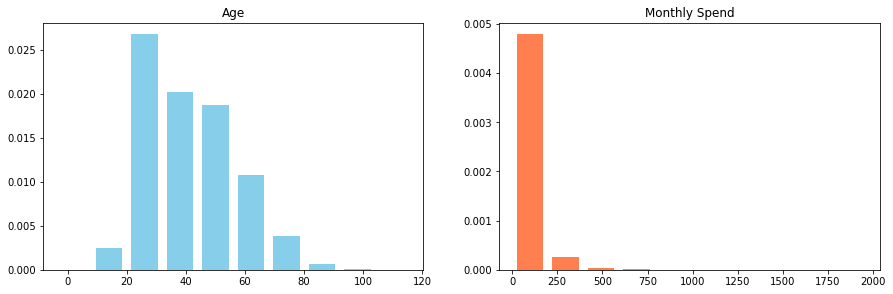

In [10]:
# Histogram of AGE and MONTHLY_SPEND
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1.hist(cons['AGE'], rwidth=0.75, color='skyblue', density=True)
ax2.hist(cons['MONTHLY_SPEND'], rwidth=0.75, color='coral', density=True)

ax1.title.set_text('Age')
ax2.title.set_text('Monthly Spend')

plt.show()

<b><u>AGE</u></b>

In [11]:
print("Number of customers aged above 99:", cons.loc[cons.AGE > 99].shape[0])
print("Number of customers aged below 16:", cons.loc[cons.AGE < 16].shape[0])

Number of customers aged above 99: 9
Number of customers aged below 16: 3


In [12]:
# Remove customers with age > 99 or < 16
cons = cons.loc[(cons.AGE <= 99) & (cons.AGE >=16)]


<b><u>MONTHLY_SPEND</u></b>

In [13]:
print("Number of customers spend less than $5 per month:", cons.loc[cons.MONTHLY_SPEND < 5].shape[0])
print("Number of customers spend less than $10 per month:", cons.loc[cons.MONTHLY_SPEND < 10].shape[0])
print("Number of customers spend more than $500 per month:", cons.loc[cons.MONTHLY_SPEND > 500].shape[0])
print("Number of customers spend more than $750 per month:", cons.loc[cons.MONTHLY_SPEND > 750].shape[0])

Number of customers spend less than $5 per month: 350
Number of customers spend less than $10 per month: 1139
Number of customers spend more than $500 per month: 133
Number of customers spend more than $750 per month: 29


Monthly speed **< \\$5 and > \\$500** are both quite unlikely, we consider them as oultiers here and impute them with the mean.spend of the rest of the customers.

In [14]:
# Impute MONTHLY_SPEND outliers with mean
spend_imputer = cons.loc[(cons.MONTHLY_SPEND >= 5) & (cons.MONTHLY_SPEND <=500), 'MONTHLY_SPEND'].mean()

cons.loc[(cons.MONTHLY_SPEND < 5), 'MONTHLY_SPEND']=spend_imputer
cons.loc[(cons.MONTHLY_SPEND > 500), 'MONTHLY_SPEND']=spend_imputer

<b><u>TENURES</u></b>

In [15]:
print("Number of cases where all three tenure variables has 0 value:",
cons.loc[(cons['ACCOUNT_TENURE'] == 0) & (cons['SERVICE_TENURE'] == 0) & (cons['SERVICE_TENURE'] == 0)].shape[0])

Number of cases where all three tenure variables has 0 value: 832


In [16]:
# Impute tripple 0 tenure cases with median 
tenure_imputer_a = cons.loc[(cons.ACCOUNT_TENURE != 0), 'ACCOUNT_TENURE'].median()
tenure_imputer_s = cons.loc[(cons.SERVICE_TENURE != 0), 'SERVICE_TENURE'].median()
tenure_imputer_p = cons.loc[(cons.PLAN_TENURE != 0), 'PLAN_TENURE'].median()

cons.loc[(cons.ACCOUNT_TENURE == 0), 'ACCOUNT_TENURE']=tenure_imputer_a
cons.loc[(cons.SERVICE_TENURE == 0), 'SERVICE_TENURE']=tenure_imputer_s
cons.loc[(cons.PLAN_TENURE == 0), 'PLAN_TENURE']=tenure_imputer_p

In [17]:
# Check summary statistics again
cons.describe().round()

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,PREV_CONTRACT_DURATION,CHURN_IND,MONTHLY_SPEND
count,39074.0,39074.0,39074.0,39074.0,39074.0,39074.0,39074.0,39074.0,39074.0,39074.0,39074.0
mean,44.0,1.0,41.0,47.0,51.0,11.0,8.0,20.0,15.0,0.0,74.0
std,32.0,1.0,15.0,49.0,21.0,9.0,8.0,8.0,11.0,0.0,63.0
min,1.0,1.0,16.0,1.0,8.0,1.0,0.0,0.0,0.0,0.0,5.0
25%,13.0,1.0,27.0,11.0,32.0,5.0,0.0,24.0,0.0,0.0,36.0
50%,40.0,1.0,39.0,32.0,55.0,9.0,7.0,24.0,24.0,0.0,55.0
75%,71.0,2.0,52.0,64.0,72.0,15.0,16.0,24.0,24.0,1.0,85.0
max,120.0,4.0,97.0,259.0,123.0,147.0,24.0,36.0,36.0,1.0,499.0


<b><u>FEATURE CORRELATION AND MULTICOLLINEARITY</u></b>

In [18]:
# Extract numeric variables into a separate dataframe

cons_num = cons.drop(columns=['CONTRACT_STATUS', 'BYO_PLAN_STATUS','COUNTRY_METRO_REGION', 
                              'HANDSET_USED_BRAND', 'STATE'], axis=1)
cons_num.shape[1]

11

In [19]:
# Correlation Matrix

corr = cons_num.corr().round(2)
corr

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,PREV_CONTRACT_DURATION,CHURN_IND,MONTHLY_SPEND
ACCOUNT_TENURE,1.00,0.16,0.25,0.80,-0.10,0.24,-0.16,0.17,0.50,-0.16,-0.16
ACCT_CNT_SERVICES,0.16,1.00,0.14,0.04,-0.00,-0.06,0.03,-0.00,0.01,-0.05,-0.01
AGE,0.25,0.14,1.00,0.26,-0.39,0.05,-0.20,-0.16,-0.01,-0.12,-0.25
SERVICE_TENURE,0.80,0.04,0.26,1.00,-0.11,0.20,-0.14,0.12,0.41,-0.15,-0.14
PLAN_ACCESS_FEE,-0.10,-0.00,-0.39,-0.11,1.00,-0.08,0.49,0.39,0.12,-0.03,0.46
PLAN_TENURE,0.24,-0.06,0.05,0.20,-0.08,1.00,-0.43,0.12,0.19,0.14,-0.07
MONTHS_OF_CONTRACT_REMAINING,-0.16,0.03,-0.20,-0.14,0.49,-0.43,1.00,0.44,-0.01,-0.24,0.33
LAST_FX_CONTRACT_DURATION,0.17,-0.00,-0.16,0.12,0.39,0.12,0.44,1.00,0.51,-0.06,0.25
PREV_CONTRACT_DURATION,0.50,0.01,-0.01,0.41,0.12,0.19,-0.01,0.51,1.00,-0.06,-0.00
CHURN_IND,-0.16,-0.05,-0.12,-0.15,-0.03,0.14,-0.24,-0.06,-0.06,1.00,0.21


<AxesSubplot:>

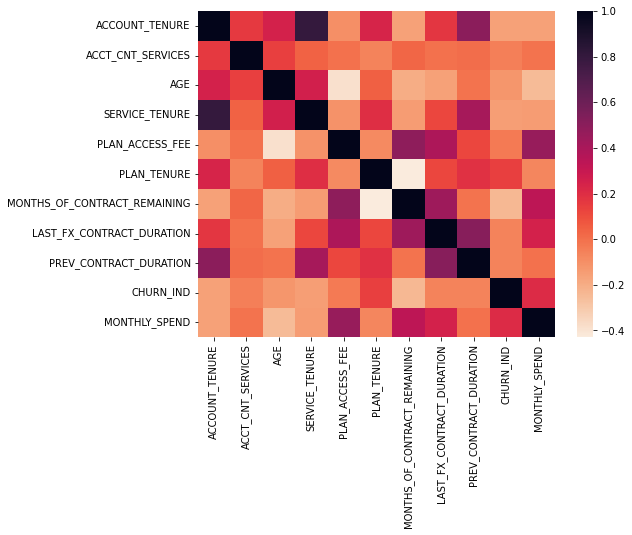

In [20]:
# Create a correlation matrix heatmap

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='rocket_r')

Key observation of potential multicollinearity issues:
* **ACCOUNT_TENURE** and **SERVICE_TENURE** are highly correlated (0.8), and both variables are moderately correlated to PLAN_TENURE. We will need to get rid of one between account/service tenure to avoid multicollinearity.

On the other hand, variables seem to be correlated to churn are:
* **MONTH_OF_CONTRACT_REMAINING**: negatively correlated (-0.24)
* **MONTHLY_SPEND:** positively correlated (0.21)
* **ACCOUNT_TENURE:** negatively (-0.16)

In [21]:
# Return feature with correlation value of greater than 0.9 with at least 1 other column
threshold = 0.80
correlated_features = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) >= threshold:
            colname = corr.columns[i]
            correlated_features.add(colname)
            
print(correlated_features)

{'SERVICE_TENURE'}


We will remove SERVICE_TENURE in the modelling stage to avoid multicollinearity issues.

###  1.3 Categorical Variables

**<u>DEPENDENT VARIABLE</u>**

In [22]:
# Check the frequncy of the two classes
cons.groupby('CHURN_IND').size()

CHURN_IND
0    23659
1    15415
dtype: int64

The dataset unfortunately is slighly <b>imbalanced</b> - 60% of the customers are class 0 (retained), and 40% are class 1 (churn). This might give whatever model we later build an advantage in predicting class 0, although that's not what we're most interested in.

**<u>FEATURE VARIABLES</u>**

In [23]:
categorical = [var for var in cons.columns if cons[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 5 categorical variables

The categorical variables are :

 ['BYO_PLAN_STATUS', 'CONTRACT_STATUS', 'HANDSET_USED_BRAND', 'COUNTRY_METRO_REGION', 'STATE']


The 5 categorial variables are: BYO_PLAN_STATUS, CONTRACT_STATUS, HANDSET_USED_BRAND, COUNTRY_METRO_REGION, STATE.
To decide wether it's worthwhile to include these categorical variables in the model, we first want to explore if they make a difference in churn - to do so, we compare the churn rate across sub-categories:

In [24]:
# Contract Status

contract = cons.groupby(['CONTRACT_STATUS', 'CHURN_IND'])[['CHURN_IND']].count().unstack()
contract.columns = contract.columns.droplevel()
contract['churn_rate'] = 100 * contract[1] / (contract[0] + contract[1])
contract.round(2)

CHURN_IND,0,1,churn_rate
CONTRACT_STATUS,,,
NO-CONTRACT,2624,2379,47.55
OFF-CONTRACT,4404,5654,56.21
ON-CONTRACT,16631,7382,30.74


In [25]:
# BYO

byo = cons.groupby(['BYO_PLAN_STATUS', 'CHURN_IND'])[['CHURN_IND']].count().unstack()
byo.columns = byo.columns.droplevel()
byo['churn_rate'] = 100 * byo[1] / (byo[0] + byo[1])
byo.round(2)

CHURN_IND,0,1,churn_rate
BYO_PLAN_STATUS,,,
BYO,5128,4348,45.88
NON BYO,18531,11067,37.39


In [26]:
# Region

region = cons.groupby(['COUNTRY_METRO_REGION','CHURN_IND'])[['CHURN_IND']].count().unstack()
region.columns = region.columns.droplevel()
region['churn_rate'] = 100 * region[1] / (region[0] + region[1])
region.round(2)

CHURN_IND,0,1,churn_rate
COUNTRY_METRO_REGION,,,
COUNTRY,6924,5514,44.33
METRO,16735,9901,37.17


In [27]:
# Handset
handset = cons.groupby(['HANDSET_USED_BRAND','CHURN_IND'])[['CHURN_IND']].count().unstack()
handset.columns = handset.columns.droplevel()
handset['churn_rate'] = 100 * handset[1] / (handset[0] + handset[1])
handset.sort_values(by='churn_rate', ascending=True).round(2)

CHURN_IND,0,1,churn_rate
HANDSET_USED_BRAND,,,
APPLE,12831,7676,37.43
SAMSUNG,7212,4420,38.00
GOOGLE,1325,833,38.60
HUAWEI,684,493,41.89
OTHER,801,795,49.81
UNKNOWN,806,1198,59.78


In [28]:
# State
state = cons.groupby(['STATE','CHURN_IND'])[['CHURN_IND']].count().unstack()
state.columns = state.columns.droplevel()
state['churn_rate'] = 100 * state[1] / (state[0] + state[1])
state.sort_values(by='churn_rate', ascending=True).round(2)

CHURN_IND,0,1,churn_rate
STATE,,,
ACT,577,299,34.13
SA,1636,882,35.03
VIC,6499,4045,38.36
NSW,8143,5274,39.31
QLD,4731,3373,41.62
TAS,159,114,41.76
WA,1899,1415,42.70
NT,15,13,46.43


Our observations can be summarised below:

* **Off contract** customers have the highest churn rate whereas customers who are on contract are least likely to churn
* **BYO** customers also have higher churn rate - suspect there's some correlation between BYO and no-contract
* **Regional** customers are more likely than metro customers to churn
* **Android** users in general have higher churn rate (incl. OTHER) than Apple users; however, the effect is marginal for big brand android (Samsung, Huawei, Google) users
* There are some **geographical differences** in churn, for example, VIC is lower than VIC, but the sample size can get quite small when it comes to ACT, TAS and NT - we'll need some grouping 

In a nutshell, they're all valid and should be included in the initial model. To do so, we'll turn them into binary variables through panda's get_dummy function, before which we'll group HANDSET and STATE into fewer categories first.

In [29]:
# Recode handset
cons['HANDSET'] = ""
android = ['SAMSUNG', 'GOOGLE', 'HUAWEI']
cons.loc[cons.HANDSET_USED_BRAND == 'APPLE', 'HANDSET'] = 'Apple user'
cons.loc[cons['HANDSET_USED_BRAND'].isin(android), 'HANDSET'] = 'Android user'
cons.loc[(cons.HANDSET_USED_BRAND == 'OTHER') | (cons.HANDSET_USED_BRAND == 'UNKNOWN'), 'HANDSET'] = 'Other device'

cons.groupby('HANDSET').size()

HANDSET
Android user    14967
Apple user      20507
Other device     3600
dtype: int64

In [30]:
# Recode state
cons.loc[(cons.STATE == 'NSW') | (cons.STATE == 'ACT'), 'STATE'] = 'NSW/ACT'
cons.loc[(cons.STATE == 'VIC') | (cons.STATE == 'TAS'), 'STATE'] = 'VIC/TAS'
cons.loc[(cons.STATE == 'QLD') | (cons.STATE == 'NT'), 'STATE'] = 'QLD/NT'

cons.groupby('STATE').size()

STATE
NSW/ACT    14293
QLD/NT      8132
SA          2518
VIC/TAS    10817
WA          3314
dtype: int64

In [31]:
# Get dummies
dregion = pd.get_dummies(cons['COUNTRY_METRO_REGION'], drop_first=True)

# Not drop first becasue i want to specify which one to drop later
dcontract= pd.get_dummies(cons['CONTRACT_STATUS'])
dbyo = pd.get_dummies(cons['BYO_PLAN_STATUS']) 
dhandset = pd.get_dummies(cons['HANDSET'])
dstate = pd.get_dummies(cons['STATE'])

In [32]:
# Join dummies with the main df
cons_clean = pd.concat([cons, dcontract, dregion, dbyo, dhandset, dstate], axis=1)

# Drop raw categorical variables 
cons_clean = cons_clean.drop(columns=['CONTRACT_STATUS', 'BYO_PLAN_STATUS','COUNTRY_METRO_REGION', 
                                      'HANDSET_USED_BRAND', 'HANDSET', 'STATE'], axis=1)


# Drop selected binaries
cons_clean = cons_clean.drop(columns=['OFF-CONTRACT','NON BYO', 'Android user', 'SA'], axis=1)

In [33]:
cons_clean.head(5)

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,PREV_CONTRACT_DURATION,CHURN_IND,...,NO-CONTRACT,ON-CONTRACT,METRO,BYO,Apple user,Other device,NSW/ACT,QLD/NT,VIC/TAS,WA
CUST_ID,,,,,,,,,,,,,,,,,,,,,
1,46,1,30.0,46,54.54,15,0,24,24,1,...,0,0,0,0,0,0,0,0,0,1
2,60,3,55.0,59,54.54,5,0,24,24,1,...,0,0,1,0,1,0,1,0,0,0
5,65,1,29.0,65,40.90,15,0,12,12,1,...,0,0,0,1,1,0,0,0,0,1
6,31,1,51.0,31,31.81,31,0,24,24,1,...,0,0,0,0,1,0,0,0,1,0
8,95,1,31.0,95,54.54,9,0,24,24,1,...,0,0,1,0,1,0,1,0,0,0


##  2. Logistic Regression

###  2.1 Baseline Model
First we'll build our baseline logistic regression model using all features.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.feature_selection import RFE

In [35]:
# Define feature set and dependent variable

features = cons_clean.drop(['CHURN_IND', 'SERVICE_TENURE'], axis=1) # drop highly correlated variable
y = cons_clean['CHURN_IND']

In [36]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
X.describe().round()

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,PREV_CONTRACT_DURATION,MONTHLY_SPEND,NO-CONTRACT,ON-CONTRACT,METRO,BYO,Apple user,Other device,NSW/ACT,QLD/NT,VIC/TAS,WA
count,39074.0,39074.0,39074.0,39074.0,39074.0,39074.0,39074.0,39074.0,39074.0,39074.0,39074.0,39074.0,39074.0,39074.0,39074.0,39074.0,39074.0,39074.0,39074.0
mean,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.0,-1.0,-2.0,-2.0,-1.0,-1.0,-2.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0,-0.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0,-0.0
50%,-0.0,-1.0,-0.0,0.0,-0.0,-0.0,0.0,1.0,-0.0,-0.0,1.0,1.0,-1.0,1.0,-0.0,-1.0,-1.0,-1.0,-0.0
75%,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.0,1.0,1.0,-1.0,1.0,-0.0,1.0,-1.0,2.0,-0.0
max,2.0,3.0,4.0,3.0,15.0,2.0,2.0,2.0,7.0,3.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,2.0,3.0


In [37]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

# checking shapes of each
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train shape:  (31259, 19)
y_train shape:  (31259,)
X_test shape:  (7815, 19)
y_test.shape:  (7815,)


In [38]:
# Build the baseline model
baselog = LogisticRegression(solver='lbfgs', max_iter=2000).fit(X_train, y_train)

In [39]:
# Prediction accuracy on the training set
y_pred_train = baselog.predict(X_train)

print("Accuracy (train): ", '{:.4f}'.format(accuracy_score(y_train, y_pred_train)))
print("F1 score (train):", '{:.4f}'.format(f1_score(y_train, y_pred_train, pos_label=1)))

Accuracy (train):  0.7227
F1 score (train): 0.6126


In [40]:
# Prediction accuracy on the test set
y_pred_test = baselog.predict(X_test)

print("Accuracy (test): ", '{:.4f}'.format(accuracy_score(y_test, y_pred_test)))
print("F1 score (test):", '{:.4f}'.format(f1_score(y_test, y_pred_test, pos_label=1)))

Accuracy (test):  0.7176
F1 score (test): 0.6108


First of all, there's only minor difference in accuracy between prediction on the training set (72.27%) and on the test set 71.76%, indicating that there's <b><u>no sign of overfitting.</u></b>

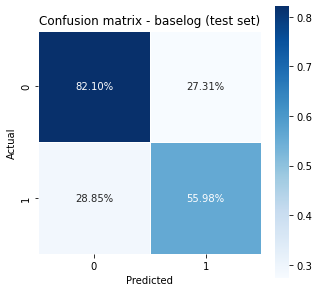

In [41]:
# Confusion Matrix on the test set
cm_test = confusion_matrix(y_test, y_pred_test)

# Visualising the confusion matrix on the test set
plt.figure(figsize=(5,5))
ax = sns.heatmap(cm_test/cm_test.astype(float).sum(axis=1), 
                 annot=True, fmt=".2%", linewidths=.5, square = True, cmap = 'Blues')

ax.set_title('Confusion matrix - baselog (test set)')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

The accuracy of our baseline model looks decent (71.76%), which is **largely contributed by the correct prediction of class 0 (retention)** - the model correctly predicted the retention of 3875 out of 4721 customers, giving an NPV of 82.10%.  

However, the model falls short when it comes to predicting churn, which is the our main objective - **the model only predicted 55.98% of churns correctly** (1732 out of 3094). This is only merely better than taking a random guess, which will give 50% chance of correct prediction. 

Clearly, the next step is to improve the recall of our model by selecting the most relevant features, before which we're going to take a look at the regression coefficients of the baseline model.

In [42]:
# Get coefficient
coef_arr = baselog.coef_
coef = coef_arr.tolist()[0] # Convert to list

# Put features and their respective coefficient in a df
feature = list(X_train.columns)
reg_coef = pd.DataFrame({'Feature':feature,'Coefficient': coef})
reg_coef.set_index("Feature")

# Sort by absolute value of the coefficient 
reg_coef = reg_coef.reindex(reg_coef.Coefficient.abs().sort_values(ascending=False).index)
reg_coef.round(4)

,Feature,Coefficient
8,MONTHLY_SPEND,0.8602
5,MONTHS_OF_CONTRACT_REMAINING,-0.6964
10,ON-CONTRACT,-0.6197
0,ACCOUNT_TENURE,-0.4168
12,BYO,-0.2913
2,AGE,-0.2842
14,Other device,0.1695
7,PREV_CONTRACT_DURATION,-0.1415
11,METRO,-0.1350
3,PLAN_ACCESS_FEE,-0.1320


Roughly speaking, we're seeing some of top influencers of churn:
* **MONTHLY_SPEND**: the more a customer spend, the more likely they is likely to churn
* **MONTHS_OF_CONTRACT_REMAINING**: the closer to the end of a contract (fewer months left), the higher the likelihood of churn
* **OFF-CONTRACT** and **NO-CONTRACT**: a customer is more likely to churn when they is off contract or doesn't have a contract at all
* **ACCOUNT TENURE**: the longer the tenure (i.e. the customer has been with the provider), the less likely they're to churn

This is aligned with what we observed earlier in the initial correlation matrix.

### 2.2 Feature Selection

Let's reiterate of objective with reference to the confusion matrix. This is relevant to a couple of concept and terms used below.
<img src="Files/confusion_matrix.png" width="450">

We're most interested in lower right corner of the matrix - TP true positives (actual=churn, predicted=turn), and specifically the percentage of all actual churns the model can correctly predict, which we want to maximise. That is:
* **Recall = TP / (TP+FN)**

Our secondary priority is to minimise FP false positivies - presumably, the company would invest in customers that are predicted to churn in near future to prevent this from happening. High FP would incurr unnecessary cost and hurt the business's profitability. The metric relevant to this regard is precision, which we also seek to maximise:
* **Precision = TP / (TP+FP)**

We'll first use RFE to select 1-10 features and observe the change in accuracy, recall and precision.

In [43]:
accuracy = []
recall = []
precision = []

for i in range(1,20):
    estimator = LogisticRegression(solver='lbfgs', max_iter=500)
    selector = RFE(estimator, i) # select i features
    selector = selector.fit(X_train, y_train) # fit selector on training set
    
    # Predict on test set
    y_pred_test = selector.predict(X_test) 
    
    # Get accuracy score and confusion matrix on test set
    acc = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)
    
    # Calculate metrics of interest from confusion matrix
    rec = cm[1][1] / (cm[1][1]+cm[1][0])
    prec = cm[1][1] / (cm[1][1]+cm[0][1])
    
    # Append results to pre-created lists
    accuracy.append(acc)
    recall.append(rec)
    precision.append(prec)

/Users/alexis/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/alexis/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/alexis/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/alexis/opt/anaconda3/lib/python3.8/site-packages/sklearn/

In [44]:
# Put the results into a dataframe
selectors = pd.DataFrame({'Accuracy': accuracy,
                          'Recall': recall,
                          'Precision': precision},
                         index = list(range(1,20)))

# Round to 4 dp
selectors.round(4)

,Accuracy,Recall,Precision
1,0.6241,0.5110,0.5259
2,0.6972,0.4783,0.6631
3,0.6985,0.5356,0.6432
4,0.7026,0.5365,0.6510
5,0.7106,0.5582,0.6587
6,0.7139,0.5588,0.6650
7,0.7149,0.5582,0.6673
8,0.7143,0.5504,0.6692
9,0.7152,0.5572,0.6682
10,0.7210,0.5611,0.6787


Text(0.5, 1.0, 'Baseline Model Prediction Accuracy')

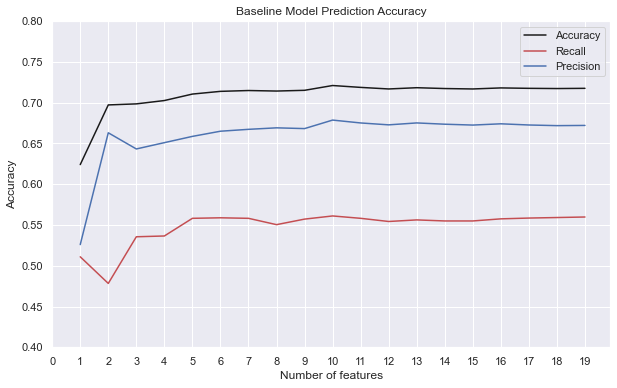

In [45]:
# Plot accuracy agaisnt number of features
sns.set_theme()

plt.figure(figsize=(10,6))
sns.lineplot(data=selectors, x=selectors.index, y='Accuracy', color='k', label='Accuracy')
sns.lineplot(data=selectors, x=selectors.index, y='Recall', color='r', label='Recall')
sns.lineplot(data=selectors, x=selectors.index, y='Precision', color='b', label='Precision')

plt.legend()
plt.ylim(0.4,0.8)
plt.xticks(np.arange(20))
plt.xlabel("Number of features")
plt.title("Baseline Model Prediction Accuracy")


<b><u>Overall Accuracy</u><b>

The biggest improvement coming from the addition of a single feature was feature 2, bringing up accruacy from 62% to 70%. From there, the increment with each additional feature has been gradual, peaking with **10 features (72.10%)**, after which accuracy starts to diminish ever so slightly.
    
<b><u>Recall</u><b>

As mentioned earlier, recall is the metrics that we're most interested in and quite interesting, the addition of the 2nd feature brings down recall (as opposed to overall accuracy and precision). The introduction of the 3rd and 5th feature is most impactful in predicting churn. After 5 features, recall doesn't improve much with any additional features - <u>if recall is the only thing we care about, we would be happily settle for these 5 features</u>. Mathematically though, recall does maximise with **10 features at 56.11%**. 
    
<b><u>Precision</u><b>

Precision benefits the most from the addition of the 2nd feature whereas the 3rd features does it more harm than good. Feature 4 to 10 each improves precision a little, leading to the peak with **feature 10 at 67.87%**.

###  2.3 Optimal LogReg Model (10 features)

    
In conlcusion, taking all metrics into consideration, the 10-feature model gives the best performance overall. Let's unpack what these 10 features are:

In [46]:
# 10 Feature Log Reg
selector10 = RFE(estimator, 10) 
selector10 = selector10.fit(X_train, y_train)

# Get selected features
all_features = X_train.columns
supp = selector10.get_support()
selected_features = list(all_features[supp]) 

# Get coefficients for selected features
coeffs = selector10.estimator_.coef_.tolist()
coeffs = coeffs[0]

/Users/alexis/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [47]:
# Put features and coefficients in a df
reg_coef = pd.DataFrame({'Feature':selected_features,'Coefficient': coeffs})
reg_coef = reg_coef.set_index("Feature")

reg_coef = reg_coef.reindex(reg_coef.Coefficient.abs().sort_values(ascending=False).index)
reg_coef.round(4)

,Coefficient
Feature,
MONTHLY_SPEND,0.8165
MONTHS_OF_CONTRACT_REMAINING,-0.7740
ON-CONTRACT,-0.6232
ACCOUNT_TENURE,-0.3922
BYO,-0.2956
AGE,-0.2446
LAST_FX_CONTRACT_DURATION,0.2270
Other device,0.1952
PREV_CONTRACT_DURATION,-0.1579


Not unlike the baseline model, some of the most impactful predictors are monthly spend, months remaining on the contract, whether the customer is on a contract or not and their account tenures. 

Another functionality of logistic regression we haven't tapped into is the predicted probability. It allows the business to draw their own lines of churn likelihood and decide where to focus their effort on customer retention - it can be at 80%, 70% or 60% depending on desired accuracy and resources available

In [48]:
# Predicted probability of churn
probs = selector10.predict_proba(X_test)[:, 1] 

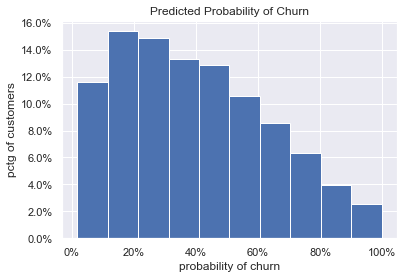

In [49]:
# Histogram of predicted churn probability
from matplotlib.ticker import PercentFormatter

plt.figure(figsize=(6,4))
plt.hist(probs, weights=np.ones(len(probs)) / len(probs))

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))

plt.title('Predicted Probability of Churn')
plt.xlabel('probability of churn')
plt.ylabel('pctg of customers')
plt.show()


## 3. KNeighbor Classifier

Now that we have an idea what customer characteristics are important in predicting churn, we are curious if other algorithm can produce better classificaiton accuracy. In this section, we are going to build a `KNeighborClassifier`, use `GridSearchCV` to find the optimal K, and report on accuracy scores with more precision by using `cross_val_score`.

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

In [51]:
# Redefine feature set as the 10 selected features
X = X[selected_features] 

print("Number of features kept:", X.shape[1])

Number of features kept: 10


In [52]:
# Build a GridSearchCV object

knn_clf = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 135, 5)} 
gs = GridSearchCV(knn_clf, param_grid, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))

In [53]:
# Fit data
gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 135, 5)}, scoring='accuracy')

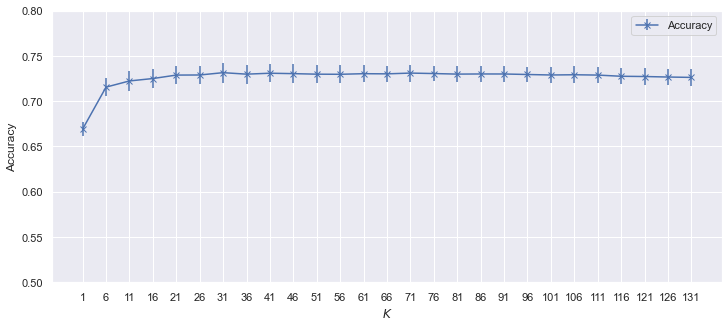

In [54]:
# Get mean accuracy scores and STDEVs
gs_mean = gs.cv_results_['mean_test_score']
gs_std = gs.cv_results_['std_test_score']

# Plot accuracy score and STDEV against K
k_range = range(1, 135, 5)

plt.figure(figsize=(12,5))
plt.errorbar(k_range, gs_mean, yerr=gs_std, marker='x', label='Accuracy')
plt.ylim([0.5, 0.8])
plt.xlabel('$K$')
plt.xticks(list(k_range))
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

Just by looking at the graph, it seems accuracy doesn't get a whole lot better from k=2 onwards, while stand deviation of accuracy scores is quite even throughout regardless of k values. To get optimal k value, we'll use the `best_pramas_` feature of GridSearchCV.

In [55]:
# Get optimal K
print("Best param value:", gs.best_params_)
print("Best CV accuracy:", "{:.4f}".format(gs.best_score_))

Best param value: {'n_neighbors': 31}
Best CV accuracy: 0.7314


The optimal k value with regards to accuracy is **k=41** and the test accuracy achieved is **73.41%**, marginal improvement from the best accuracy achieved with the logistic regression model (72.1%). Note that improving overall accuracy is not our only focus - we're more interested in the predication accuracy of churn (**recall**). Let's have a look at the confusion matrix of best estimator with k=41.

In [56]:
# Prediction using the optimal k
y_pred = gs.best_estimator_.predict(X)

# Get confustion matrix
gs_cm = confusion_matrix(y, y_pred)
gs_cm

array([[20314,  3345],
       [ 6415,  9000]])

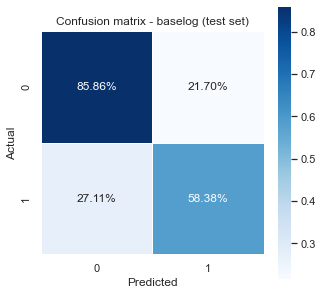

In [57]:
# Visualise confusion matrix
plt.figure(figsize=(5,5))
ax = sns.heatmap(gs_cm / gs_cm.astype(float).sum(axis=1), annot=True, fmt=".2%", linewidths=.5, square = True, cmap = 'Blues')

ax.set_title('Confusion matrix - baselog (test set)')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

Comparing to the 10-feature logistic regression model, the **recall** rate has also improved slightly from 56.11% to **58.38%**. Waht's more noteworthy is that **percision** (TP/(TP+FP)) improved more, from 67.87% to **72.90%**, meaning that the KNN classifier is less likely to raise a false alarm on customers that will actually stay with Optus, which is ideal in terms of cost saving.

The overall conclusion here is that the KNeighborClassifier provides better overall accuracy as well as better recall and precision. However, the logistic regression does have the ability to predict the **probability of churn**, and allow the business to draw its own threshold of 'risk of churn.'

## 4. Naive Bayes

Naive Bayes is another method that will have probability as part of the prediction output - in effect, the classification is based on probability. So here we're going to build a NB classifier with the **same 10 features** in an attempt to see if it **improves prediction accuracy while keeping the probability function** that logistic regression has.

In [58]:
# Build a GridSearchCV object with GaussianNB
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
param_nb = {'var_smoothing': np.logspace(0, -9, num=100)}
gs2 = GridSearchCV(nb_clf, param_nb, verbose=1, 
                  scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))

In [59]:
# Fit data
gs2.fit(X, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [60]:
# Get optimal parameter and accuracy score
print("Best param value:", gs2.best_params_)
print("Best CV accuracy:", "{:.4f}".format(gs2.best_score_))

Best param value: {'var_smoothing': 0.08111308307896872}
Best CV accuracy: 0.6612


Surprisingly and unfortunately, the overall accuracy of the NB classifier even with the optimal parameter is still lower than that of both logistic regression and kNN classifier - however, we still want to see if it offers better recall by any chance:

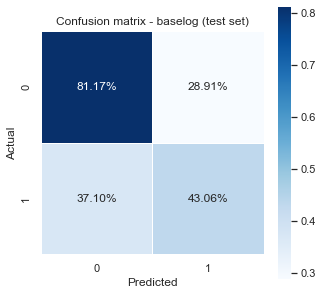

In [61]:
# Prediction using the optimal parameter
y_pred = gs2.best_estimator_.predict(X)

# Get confustion matrix
gs2_cm = confusion_matrix(y, y_pred)

# Visualise confusion matrix
plt.figure(figsize=(5,5))
ax = sns.heatmap(gs2_cm / gs2_cm.astype(float).sum(axis=1), annot=True, fmt=".2%", linewidths=.5, square = True, cmap = 'Blues')

ax.set_title('Confusion matrix - baselog (test set)')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

Sadly no - the **recall rate (40.71%)** of the NB classifier is significantly lower than that of KNN classifier and logreg. 

## 5. Model Comparison and Final Model Choice

In [64]:
# Create summary of accuracy for the three models

sum_lr = [0.7210, 0.5611, 0.6787]
sum_knn = [gs.best_score_, 
           gs_cm[1][1]/(gs_cm[1][1]+gs_cm[1][0]), 
           gs_cm[1][1]/(gs_cm[1][1]+gs_cm[0][1])]
sum_nb = [gs2.best_score_, 
          gs2_cm[1][1]/(gs2_cm[1][1]+gs2_cm[1][0]),
          gs2_cm[1][1]/(gs2_cm[1][1]+gs2_cm[0][1])] 

lst = (sum_lr, sum_knn, sum_nb)
summary = pd.DataFrame(lst, index=['LogReg','KNN','NB'],
                       columns =['Accuracy', 'Recall', 'Precision'], dtype = float)
summary.round(4)

,Accuracy,Recall,Precision
LogReg,0.7210,0.5611,0.6787
KNN,0.7314,0.5838,0.7290
NB,0.6612,0.4306,0.5983


It's clear from above summary that the **KNeighborClassifier** performs the best on all three metrics, yielding the highest recall rate in particular, and would be our first choice of model. 

However, as mentioned earlier, **Logistic Regression** not only provides a binary regression outcome but also comes with the probability of churn for each prediction, which can be desirable for making business decisions at more granular level. The ultimate decision might be Optus' to make depending on what they will use the prediction outcome for and how they'd like to use it.

## 6. Next Step - Application to Business Customers 

As discuss, above analysis focused on consumers (i.e. telco for personal use) given my knowledge in the business structure of telco companies. Naturally, the next step would be taking our model of choice to the business customers' data and see it performs equally well or it's necessary to build a separate model for business customers.

However, given the time constraints I won't be able to take it that far and will have to end my analysis here.